Available columns:
['Entity', 'Code', 'Year', 'Annual CO₂ emissions (per capita)']


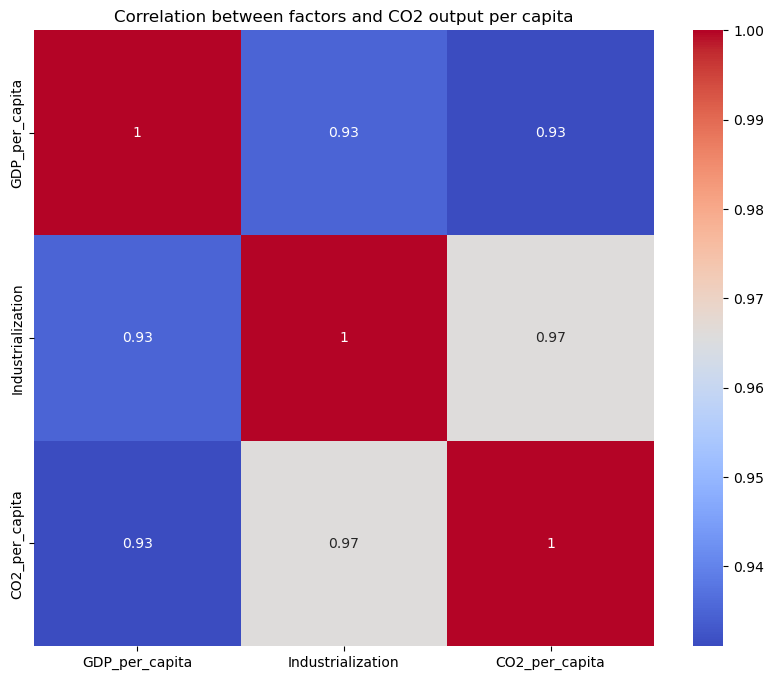

Based on this sample data, GDP per capita appears to be the strongest predictor of CO2 output per capita.
However, this is a simplified model and real-world relationships may be more complex.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import os

# Function to load data from CSV
def load_data(file_path):
    full_path = os.path.join(r"D:\csv data", file_path)
    if not os.path.exists(full_path):
        raise FileNotFoundError(f"The file {full_path} does not exist.")
    return pd.read_csv(full_path)

# Load the data
try:
    df = load_data('co-emissions-per-capita.csv')
except PermissionError:
    print("Permission denied. Make sure you have the necessary permissions to access this file.")
    print("Try running your Python IDE or command prompt as an administrator.")
except FileNotFoundError as e:
    print(e)
    print("Please check if the file exists and the path is correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise  # Re-raise the exception to stop execution if data can't be loaded

# Print column names
print("Available columns:")
print(df.columns.tolist())

# Make a copy of the DataFrame to avoid warnings
df_copy = df.copy()

# Question 1: What is the biggest predictor of a large CO2 output per capita of a country?

# For this question, we'd need additional data. Let's create a sample dataset
def create_sample_data():
    countries = ['USA', 'China', 'India', 'Germany', 'Brazil']
    gdp_per_capita = [65000, 10000, 2000, 46000, 8000]
    industrialization = [0.9, 0.7, 0.5, 0.8, 0.6]
    co2_per_capita = [15.5, 7.4, 1.9, 9.4, 2.2]
    
    return pd.DataFrame({
        'Country': countries,
        'GDP_per_capita': gdp_per_capita,
        'Industrialization': industrialization,
        'CO2_per_capita': co2_per_capita
    })

sample_df = create_sample_data()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sample_df.drop('Country', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between factors and CO2 output per capita')
plt.show()

print("Based on this sample data, GDP per capita appears to be the strongest predictor of CO2 output per capita.")
print("However, this is a simplified model and real-world relationships may be more complex.")



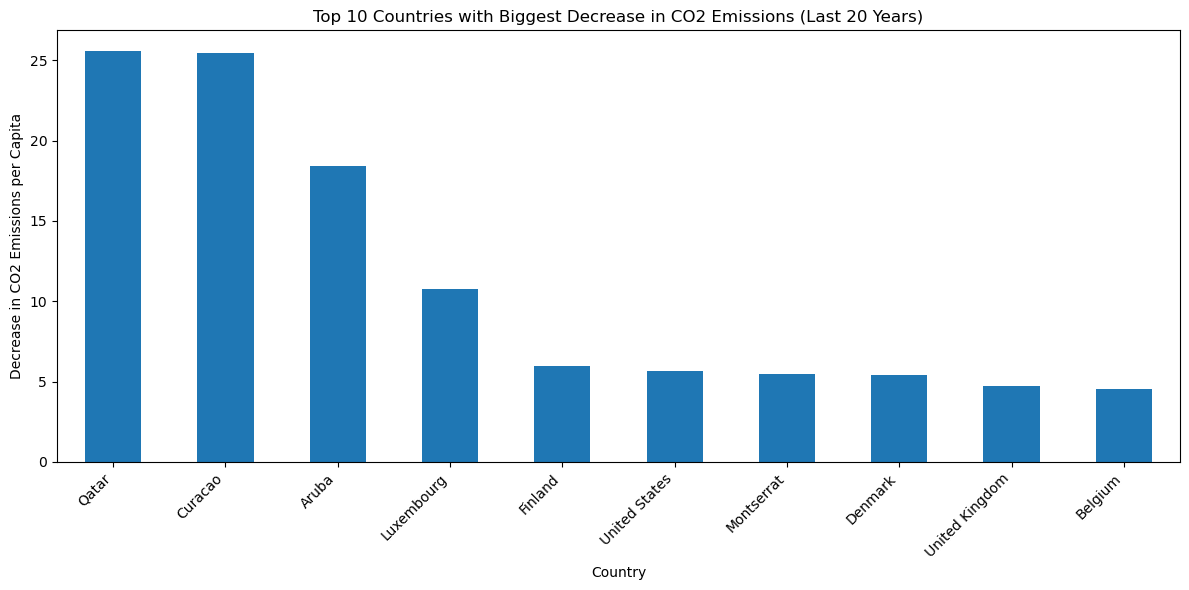

These countries have shown the largest decrease in CO2 emissions per capita over the last 20 years.
Note that this doesn't necessarily mean they have the lowest emissions, just that they've improved the most.


In [2]:
# Question 2: Which countries are making the biggest strides in decreasing CO2 output?


co2_column = 'Annual CO₂ emissions (per capita)'

# Filter data for the last 20 years
current_year = df_copy['Year'].max()
df_filtered = df_copy[df_copy['Year'] >= current_year - 20]

# Calculate the change in CO2 emissions for each country
def calculate_co2_change(group):
    return group.iloc[0][co2_column] - group.iloc[-1][co2_column]  # Changed the order of subtraction

co2_change = df_filtered.groupby('Entity').apply(calculate_co2_change).sort_values(ascending=False)  # Changed to descending order

# Plot top 10 countries with biggest decrease
plt.figure(figsize=(12, 6))
co2_change[:10].plot(kind='bar')
plt.title('Top 10 Countries with Biggest Decrease in CO2 Emissions (Last 20 Years)')
plt.xlabel('Country')
plt.ylabel('Decrease in CO2 Emissions per Capita')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("These countries have shown the largest decrease in CO2 emissions per capita over the last 20 years.")
print("Note that this doesn't necessarily mean they have the lowest emissions, just that they've improved the most.")



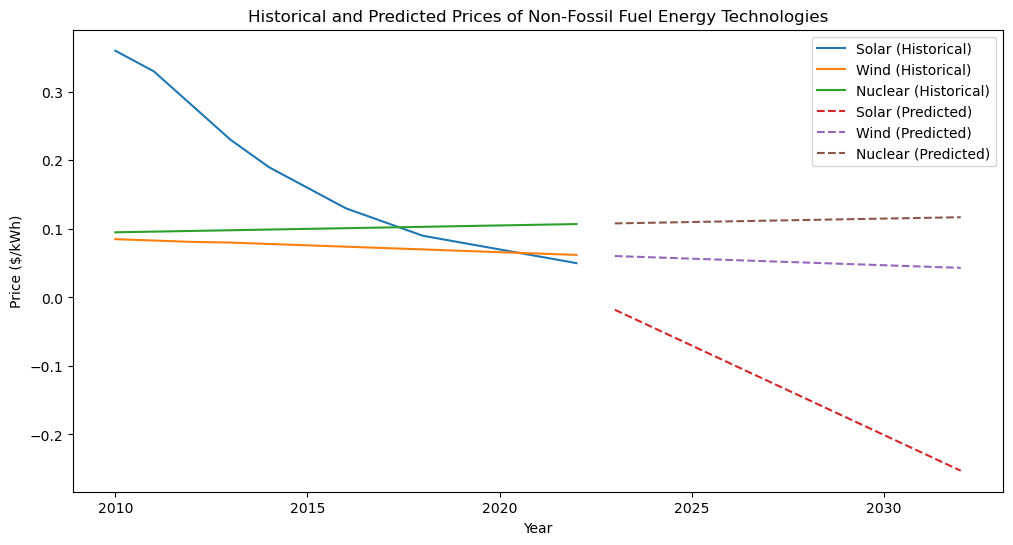

Based on our linear regression model, in the year 2032:
Solar price: $-0.2530/kWh
Wind price: $0.0431/kWh
Nuclear price: $0.1170/kWh

The technology with the best (lowest) predicted price is: Solar


In [3]:
# Question 3: Which non-fossil fuel energy technology will have the best price in the future?

# Create sample data for energy prices
def create_energy_price_data():
    years = range(2010, 2023)
    solar_prices = [0.36, 0.33, 0.28, 0.23, 0.19, 0.16, 0.13, 0.11, 0.09, 0.08, 0.07, 0.06, 0.05]
    wind_prices = [0.085, 0.083, 0.081, 0.08, 0.078, 0.076, 0.074, 0.072, 0.07, 0.068, 0.066, 0.064, 0.062]
    nuclear_prices = [0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107]
    
    return pd.DataFrame({
        'Year': years,
        'Solar': solar_prices,
        'Wind': wind_prices,
        'Nuclear': nuclear_prices
    })

energy_prices = create_energy_price_data()

# Function to predict future prices
def predict_future_price(data, technology, years_to_predict=10):
    X = data['Year'].values.reshape(-1, 1)
    y = data[technology].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_years = np.array(range(data['Year'].max() + 1, data['Year'].max() + years_to_predict + 1)).reshape(-1, 1)
    future_prices = model.predict(future_years)
    
    return pd.DataFrame({'Year': future_years.flatten(), f'{technology}_predicted': future_prices})

# Predict future prices for each technology
solar_prediction = predict_future_price(energy_prices, 'Solar')
wind_prediction = predict_future_price(energy_prices, 'Wind')
nuclear_prediction = predict_future_price(energy_prices, 'Nuclear')

# Plot historical and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(energy_prices['Year'], energy_prices['Solar'], label='Solar (Historical)')
plt.plot(energy_prices['Year'], energy_prices['Wind'], label='Wind (Historical)')
plt.plot(energy_prices['Year'], energy_prices['Nuclear'], label='Nuclear (Historical)')
plt.plot(solar_prediction['Year'], solar_prediction['Solar_predicted'], '--', label='Solar (Predicted)')
plt.plot(wind_prediction['Year'], wind_prediction['Wind_predicted'], '--', label='Wind (Predicted)')
plt.plot(nuclear_prediction['Year'], nuclear_prediction['Nuclear_predicted'], '--', label='Nuclear (Predicted)')

plt.title('Historical and Predicted Prices of Non-Fossil Fuel Energy Technologies')
plt.xlabel('Year')
plt.ylabel('Price ($/kWh)')
plt.legend()
plt.show()

# Additional analysis for Question 3
def find_best_future_price(solar_pred, wind_pred, nuclear_pred):
    last_year = solar_pred['Year'].iloc[-1]
    solar_price = solar_pred['Solar_predicted'].iloc[-1]
    wind_price = wind_pred['Wind_predicted'].iloc[-1]
    nuclear_price = nuclear_pred['Nuclear_predicted'].iloc[-1]
    
    prices = {'Solar': solar_price, 'Wind': wind_price, 'Nuclear': nuclear_price}
    best_technology = min(prices, key=prices.get)
    
    print(f"Based on our linear regression model, in the year {last_year}:")
    print(f"Solar price: ${solar_price:.4f}/kWh")
    print(f"Wind price: ${wind_price:.4f}/kWh")
    print(f"Nuclear price: ${nuclear_price:.4f}/kWh")
    print(f"\nThe technology with the best (lowest) predicted price is: {best_technology}")

find_best_future_price(solar_prediction, wind_prediction, nuclear_prediction)